# Time Series Analysis at Grid Point (256, 256)

This notebook analyzes the time evolution of density, potential, and vorticity at a specific grid point (x=256, y=256).

## Grid Point
- x = 256
- y = 256
- Frames: 0-5000 (5001 total frames)


In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys

# Try to import h5py, install if needed
try:
    import h5py
    print(f"h5py version: {h5py.__version__}")
except ImportError:
    print("h5py not found. Installing...")
    import subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "h5py", "--user"])
    import h5py
    print("h5py installed successfully")

# Set up plotting
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Set data directory
data_dir = "/global/homes/d/dn2648/work/turbulence_data/alpha01kappa10"
print(f"Data directory: {data_dir}")


h5py version: 3.10.0
Data directory: /global/homes/d/dn2648/work/turbulence_data/alpha01kappa10


In [4]:
def load_h5_data(filename, dataset_name=None):
    """Load data from an HDF5 file."""
    filepath = os.path.join(data_dir, filename)
    if not os.path.exists(filepath):
        print(f"File {filename} does not exist")
        return None
    
    try:
        with h5py.File(filepath, 'r') as f:
            if dataset_name is None:
                # Try to find the first dataset
                keys = list(f.keys())
                if keys:
                    dataset_name = keys[0]
                else:
                    print(f"No datasets found in {filename}")
                    return None
            
            data = f[dataset_name][:]
            print(f"Loaded {dataset_name} from {filename}")
            print(f"  Shape: {data.shape}")
            return data
    except Exception as e:
        print(f"Error loading {filename}: {e}")
        return None

# Load data from each file
den_data = load_h5_data('den.h5')
phi_data = load_h5_data('phi.h5')
w_data = load_h5_data('w.h5')


Loaded den from den.h5
  Shape: (5001, 512, 512)
Loaded phi from phi.h5
  Shape: (5001, 512, 512)
Loaded w from w.h5
  Shape: (5001, 512, 512)


In [5]:
# Extract time series at grid point (x=256, y=256)
x_coord = 256
y_coord = 256

# Verify grid coordinates are valid
if den_data is not None:
    nframes, nx, ny = den_data.shape
    print(f"Data shape: ({nframes}, {nx}, {ny})")
    print(f"Extracting time series at grid point (x={x_coord}, y={y_coord})")
    
    if x_coord >= nx or y_coord >= ny:
        print(f"Error: Grid coordinates ({x_coord}, {y_coord}) out of range!")
        print(f"Valid range: x in [0, {nx-1}], y in [0, {ny-1}]")
    else:
        # Extract time series (frames 0-5000)
        den_timeseries = den_data[0:5001, y_coord, x_coord]  # Note: numpy indexing is [time, y, x]
        phi_timeseries = phi_data[0:5001, y_coord, x_coord]
        w_timeseries = w_data[0:5001, y_coord, x_coord]
        
        print(f"Extracted time series with {len(den_timeseries)} frames")
        print(f"Density range: [{np.min(den_timeseries):.6e}, {np.max(den_timeseries):.6e}]")
        print(f"Potential range: [{np.min(phi_timeseries):.6e}, {np.max(phi_timeseries):.6e}]")
        print(f"Vorticity range: [{np.min(w_timeseries):.6e}, {np.max(w_timeseries):.6e}]")
else:
    print("Error: Could not load data")


Data shape: (5001, 512, 512)
Extracting time series at grid point (x=256, y=256)
Extracted time series with 5001 frames
Density range: [-1.849961e+01, 1.799925e+01]
Potential range: [-2.516876e+01, 1.637213e+01]
Vorticity range: [-2.305026e+01, 4.335625e+01]


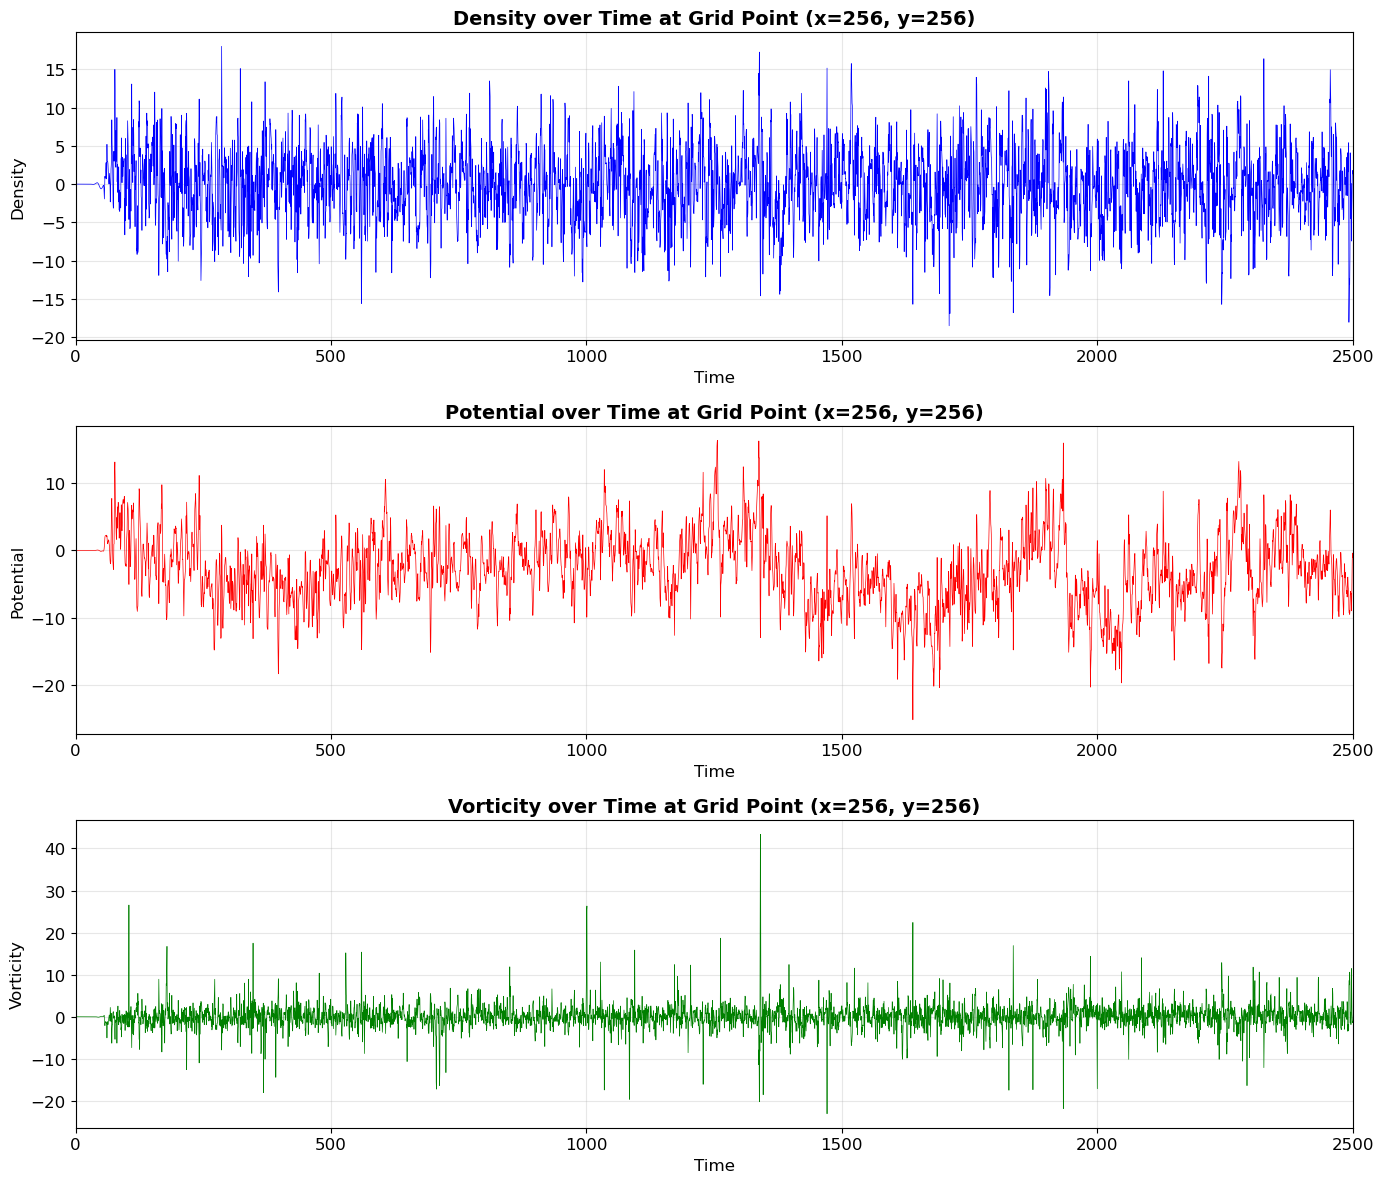

In [6]:
# Calculate time array
dt = 0.005
nfdump = 100
time = np.arange(5001) * dt * nfdump  # Time for frames 0-5000

# Create three separate plots
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Plot 1: Density over time
axes[0].plot(time, den_timeseries, 'b-', linewidth=0.5)
axes[0].set_xlabel('Time', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].set_title(f'Density over Time at Grid Point (x={x_coord}, y={y_coord})', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(time[0], time[-1])

# Plot 2: Potential over time
axes[1].plot(time, phi_timeseries, 'r-', linewidth=0.5)
axes[1].set_xlabel('Time', fontsize=12)
axes[1].set_ylabel('Potential', fontsize=12)
axes[1].set_title(f'Potential over Time at Grid Point (x={x_coord}, y={y_coord})', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(time[0], time[-1])

# Plot 3: Vorticity over time
axes[2].plot(time, w_timeseries, 'g-', linewidth=0.5)
axes[2].set_xlabel('Time', fontsize=12)
axes[2].set_ylabel('Vorticity', fontsize=12)
axes[2].set_title(f'Vorticity over Time at Grid Point (x={x_coord}, y={y_coord})', fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3)
axes[2].set_xlim(time[0], time[-1])

plt.tight_layout()
plt.show()


In [7]:
# Save time series to CSV file
output_dir = "/global/homes/d/dn2648/notebooks/mhw_turbulence"
os.makedirs(output_dir, exist_ok=True)

csv_filename = os.path.join(output_dir, "x256y256_timeseries.csv")

# Create DataFrame with time and the three time series
df = pd.DataFrame({
    'frame': np.arange(5001),
    'time': time,
    'density': den_timeseries,
    'potential': phi_timeseries,
    'vorticity': w_timeseries
})

# Save to CSV
df.to_csv(csv_filename, index=False)
print(f"Time series saved to: {csv_filename}")
print(f"CSV file contains {len(df)} rows")
print(f"\nFirst few rows:")
print(df.head())
print(f"\nLast few rows:")
print(df.tail())


Time series saved to: /global/homes/d/dn2648/notebooks/mhw_turbulence/x256y256_timeseries.csv
CSV file contains 5001 rows

First few rows:
   frame  time   density  potential  vorticity
0      0   0.0 -0.000088  -0.000088   0.022597
1      1   0.5 -0.000049  -0.000012   0.000243
2      2   1.0 -0.000051  -0.000011   0.000202
3      3   1.5 -0.000050  -0.000009   0.000161
4      4   2.0 -0.000049  -0.000008   0.000130

Last few rows:
      frame    time   density  potential  vorticity
4996   4996  2498.0 -3.412650  -7.410541   4.638269
4997   4997  2498.5 -1.721010  -4.237697   0.628150
4998   4998  2499.0  1.133027  -1.447997  -0.569710
4999   4999  2499.5  1.779145  -0.384697  -1.408207
5000   5000  2500.0  1.352949  -1.016305  -1.064726
